### Andrew EDA Notebook 11.2.2024
#### Notes:
1. EDA to identify how time series ridership data is structured.
2. Identified that we can reduce stations to only those who meet threshold of 90% completeness of data, the rest of the values will be imputed based on the mean hourly ridership for each given hour at each station.
3. reated clean time series data sets for 2022 and 2023 ridership saved to "Clean_data" folder in the data assets folder.

In [1]:
import sys
!{sys.executable} -m pip install numpy pandas

In [2]:
import numpy as np
import pandas as pd

In [3]:
df_hr_22 = pd.read_pickle(r'D:\capstone_F24\data\MTA_Subway_Hourly_Ridership_2022.pkl')
display(df_hr_22)

df_hr_23 = pd.read_pickle(r'D:\capstone_F24\data\MTA_Subway_Hourly_Ridership_2023.pkl')
display(df_hr_23)

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference
0,2022-02-17 22:00:00,subway,59,9 Av (D),Brooklyn,omny,OMNY - Full Fare,4,0,40.646294,-73.994320,POINT (-73.99432 40.646294)
1,2022-03-10 23:00:00,subway,404,28 St (6),Manhattan,omny,OMNY - Other,1,0,40.743070,-73.984260,POINT (-73.98426 40.74307)
2,2022-10-05 21:00:00,subway,272,"36 St (M,R)",Queens,omny,OMNY - Full Fare,14,0,40.752040,-73.928780,POINT (-73.92878 40.75204)
3,2022-10-05 22:00:00,subway,420,"219 St (2,5)",Bronx,omny,OMNY - Full Fare,5,0,40.883896,-73.862630,POINT (-73.86263 40.883896)
4,2022-10-05 10:00:00,subway,218,"167 St (B,D)",Bronx,omny,OMNY - Full Fare,78,6,40.833770,-73.918440,POINT (-73.91844 40.83377)
...,...,...,...,...,...,...,...,...,...,...,...,...
22514157,2022-02-06 20:00:00,subway,99,"Lorimer St (M,J)",Brooklyn,metrocard,Metrocard - Full Fare,8,0,40.703870,-73.947410,POINT (-73.94741 40.70387)
22514158,2022-02-06 12:00:00,subway,95,"Gates Av (J,Z)",Brooklyn,metrocard,Metrocard - Unlimited 30-Day,16,0,40.689630,-73.922270,POINT (-73.92227 40.68963)
22514159,2022-12-28 22:00:00,subway,245,18 Av (F),Brooklyn,omny,OMNY - Full Fare,5,1,40.629753,-73.976974,POINT (-73.976974 40.629753)
22514160,2022-03-24 14:00:00,subway,217,"170 St (B,D)",Bronx,omny,OMNY - Full Fare,61,2,40.839306,-73.913400,POINT (-73.9134 40.839306)


,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference
0,2023-09-02 15:00:00,subway,300,191 St (1),Manhattan,omny,OMNY - Full Fare,119,1,40.855225,-73.929410,POINT (-73.92941 40.855225)
1,2023-09-02 19:00:00,subway,304,145 St (1),Manhattan,omny,OMNY - Full Fare,97,2,40.826550,-73.950360,POINT (-73.95036 40.82655)
2,2023-09-27 08:00:00,subway,97,"Myrtle Av (M,J,Z)",Brooklyn,metrocard,Metrocard - Unlimited 30-Day,141,0,40.697210,-73.935650,POINT (-73.93565 40.69721)
3,2023-09-27 21:00:00,subway,56,Ocean Pkwy (Q),Brooklyn,metrocard,Metrocard - Other,3,0,40.576313,-73.968500,POINT (-73.9685 40.576313)
4,2023-09-27 14:00:00,subway,159,"81 St-Museum of Natural History (C,B)",Manhattan,metrocard,Metrocard - Unlimited 30-Day,46,0,40.781433,-73.972145,POINT (-73.972145 40.781433)
...,...,...,...,...,...,...,...,...,...,...,...,...
25588026,2023-09-02 22:00:00,subway,254,Jamaica-179 St (F),Queens,metrocard,Metrocard - Other,19,2,40.712646,-73.783810,POINT (-73.78381 40.712646)
25588027,2023-09-02 07:00:00,subway,254,Jamaica-179 St (F),Queens,omny,OMNY - Full Fare,106,38,40.712646,-73.783810,POINT (-73.78381 40.712646)
25588028,2023-09-02 17:00:00,subway,376,Brook Av (6),Bronx,omny,OMNY - Full Fare,36,1,40.807568,-73.919240,POINT (-73.91924 40.807568)
25588029,2023-09-02 12:00:00,subway,297,215 St (1),Manhattan,metrocard,Metrocard - Other,6,0,40.869446,-73.915276,POINT (-73.915276 40.869446)


In [4]:
df_hr_22['station_complex_id'].unique().to

array(['59', '404', '272', '420', '218', '193', '165', '398', '61', '75',
       '333', '475', '74', '67', '369', '405', '41', '194', '383', '215',
       '3', '449', '270', '62', '217', '388', '373', '282', '294', '438',
       '455', '123', '118', '119', '33', '396', '69', '306', '407', '80',
       '428', '336', '224', '255', '262', '82', '13', '38', '5', '53',
       '295', '260', '361', '232', '430', '378', '32', '191', '213', '71',
       '34', '386', '245', '268', '320', '304', '31', '477', '250', '457',
       '81', '248', '251', '437', '377', '376', '312', '418', '64', '321',
       '66', '385', '152', '290', '319', '366', '37', '78', '419', '379',
       '65', '158', '70', '129', '52', '190', '95', '98', '439', '403',
       '173', '216', '91', '387', '10', '141', '208', '445', '324', '79',
       '235', '68', '182', '316', '154', '258', '162', '301', '422',
       '476', '364', '325', '220', '207', '459', '50', '103', '446',
       '393', '228', '440', '122', '189', '125', '

### QUESTION: Are there stations not included in both datasets?

In [48]:
stations_22 = df_hr_22['station_complex_id'].unique()
print(f'There are {len(stations_22)} unique stations in 2022 {stations_22}')
stations_23 = df_hr_23['station_complex_id'].unique()
print(f'There are {len(stations_23)} unique stations in 2022 {stations_23}')

# Convert lists to sets for efficient comparison
station_22_set = set(stations_22)
station_23_set = set(stations_23)

# Find exclusive stations for each year
exclusive_to_22 = station_22_set - station_23_set
exclusive_to_23 = station_23_set - station_22_set

print("Stations exclusive to 2022:", exclusive_to_22)
print("Stations exclusive to 2023:", exclusive_to_23)

There are 854 unique stations in 2022 ['59' '404' '272' '420' '218' '193' '165' '398' '61' '75' '333' '475' '74'
 '67' '369' '405' '41' '194' '383' '215' '3' '449' '270' '62' '217' '388'
 '373' '282' '294' '438' '455' '123' '118' '119' '33' '396' '69' '306'
 '407' '80' '428' '336' '224' '255' '262' '82' '13' '38' '5' '53' '295'
 '260' '361' '232' '430' '378' '32' '191' '213' '71' '34' '386' '245'
 '268' '320' '304' '31' '477' '250' '457' '81' '248' '251' '437' '377'
 '376' '312' '418' '64' '321' '66' '385' '152' '290' '319' '366' '37' '78'
 '419' '379' '65' '158' '70' '129' '52' '190' '95' '98' '439' '403' '173'
 '216' '91' '387' '10' '141' '208' '445' '324' '79' '235' '68' '182' '316'
 '154' '258' '162' '301' '422' '476' '364' '325' '220' '207' '459' '50'
 '103' '446' '393' '228' '440' '122' '189' '125' '130' '134' '628' '222'
 '627' '72' '276' '603' '188' '214' '326' '636' '608' '613' '271' '155'
 '625' '221' '127' '126' '54' '153' '622' '192' '623' '16' '327' '323'
 '28' '151' '55' 

### EDA: Review structure of grouped data by station complex ID and timestamp

In [49]:
# Convert transit_timestamp to datetime
df_hr_22['transit_timestamp'] = pd.to_datetime(df_hr_22['transit_timestamp'])
df_hr_22['ridership'] = df_hr_22['ridership'].str.replace(',', '').astype(int)
# Convert transit_timestamp to datetime
df_hr_23['transit_timestamp'] = pd.to_datetime(df_hr_23['transit_timestamp'])
df_hr_23['ridership'] = df_hr_23['ridership'].str.replace(',', '').astype(int)


In [50]:
# Group by `station_complex_id` and `transit_timestamp` to sum up ridership
hourly_ridership_22 = df_hr_22.groupby(['station_complex_id', 'transit_timestamp']).agg(
    {
        'ridership': 'sum',
        'station_complex': 'first', # Keep station info
        'borough': 'first',
        'latitude': 'first',
        'longitude': 'first'
    }
).reset_index()
# Group by `station_complex_id` and `transit_timestamp` to sum up ridership
hourly_ridership_23 = df_hr_23.groupby(['station_complex_id', 'transit_timestamp']).agg(
    {
        'ridership': 'sum',
        'station_complex': 'first', # Keep station info
        'borough': 'first',
        'latitude': 'first',
        'longitude': 'first'
    }
).reset_index()

display(hourly_ridership_22)
display(hourly_ridership_23)

,station_complex_id,transit_timestamp,ridership,station_complex,borough,latitude,longitude
0,1,2022-02-19 00:00:00,58,"Astoria-Ditmars Blvd (N,W)",Queens,40.775036,-73.91203
1,1,2022-02-19 01:00:00,24,"Astoria-Ditmars Blvd (N,W)",Queens,40.775036,-73.91203
2,1,2022-02-19 02:00:00,2,"Astoria-Ditmars Blvd (N,W)",Queens,40.775036,-73.91203
3,1,2022-02-19 03:00:00,7,"Astoria-Ditmars Blvd (N,W)",Queens,40.775036,-73.91203
4,1,2022-02-19 04:00:00,18,"Astoria-Ditmars Blvd (N,W)",Queens,40.775036,-73.91203
...,...,...,...,...,...,...,...
3484081,TRAM2,2022-12-31 19:00:00,79,RI Tramway (Roosevelt),Manhattan,40.757340,-73.95412
3484082,TRAM2,2022-12-31 20:00:00,60,RI Tramway (Roosevelt),Manhattan,40.757340,-73.95412
3484083,TRAM2,2022-12-31 21:00:00,57,RI Tramway (Roosevelt),Manhattan,40.757340,-73.95412
3484084,TRAM2,2022-12-31 22:00:00,59,RI Tramway (Roosevelt),Manhattan,40.757340,-73.95412


,station_complex_id,transit_timestamp,ridership,station_complex,borough,latitude,longitude
0,1,2023-01-04 00:00:00,32,"Astoria-Ditmars Blvd (N,W)",Queens,40.775036,-73.91203
1,1,2023-01-04 01:00:00,21,"Astoria-Ditmars Blvd (N,W)",Queens,40.775036,-73.91203
2,1,2023-01-04 02:00:00,8,"Astoria-Ditmars Blvd (N,W)",Queens,40.775036,-73.91203
3,1,2023-01-04 03:00:00,14,"Astoria-Ditmars Blvd (N,W)",Queens,40.775036,-73.91203
4,1,2023-01-04 04:00:00,57,"Astoria-Ditmars Blvd (N,W)",Queens,40.775036,-73.91203
...,...,...,...,...,...,...,...
3844186,TRAM2,2023-12-31 19:00:00,281,RI Tramway (Roosevelt),Manhattan,40.757340,-73.95412
3844187,TRAM2,2023-12-31 20:00:00,186,RI Tramway (Roosevelt),Manhattan,40.757340,-73.95412
3844188,TRAM2,2023-12-31 21:00:00,157,RI Tramway (Roosevelt),Manhattan,40.757340,-73.95412
3844189,TRAM2,2023-12-31 22:00:00,106,RI Tramway (Roosevelt),Manhattan,40.757340,-73.95412


In [51]:
hourly_ridership_22.to_csv('hrly_22.csv')
hourly_ridership_23.to_csv('hrly_23.csv')


### TRANSFORM DATA: Convert long time series to wide time series

In [52]:
# Pivot the table to create wide format with `transit_timestamp` as columns
wide_data_22 = hourly_ridership_22.pivot(
    index=['station_complex_id', 'station_complex', 'borough', 'latitude', 'longitude'],
    columns='transit_timestamp',
    values='ridership'
).reset_index()

# Flatten the column hierarchy created by pivot
wide_data_22.columns.name = None  # Remove the column name
wide_data_22.columns = [f"{col}" for col in wide_data_22.columns]
display(wide_data_22)

,station_complex_id,station_complex,borough,latitude,longitude,2022-02-01 00:00:00,2022-02-01 01:00:00,2022-02-01 02:00:00,2022-02-01 03:00:00,2022-02-01 04:00:00,...,2022-12-31 14:00:00,2022-12-31 15:00:00,2022-12-31 16:00:00,2022-12-31 17:00:00,2022-12-31 18:00:00,2022-12-31 19:00:00,2022-12-31 20:00:00,2022-12-31 21:00:00,2022-12-31 22:00:00,2022-12-31 23:00:00
0,1,"Astoria-Ditmars Blvd (N,W)",Queens,40.775036,-73.912030,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,"Astoria Blvd (N,W)",Queens,40.770260,-73.917850,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,"30 Av (N,W)",Queens,40.766780,-73.921480,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,"Broadway (N,W)",Queens,40.761820,-73.925510,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,"36 Av (N,W)",Queens,40.756805,-73.929570,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,97,"Myrtle Av (M,J,Z)",Brooklyn,40.697210,-73.935650,13.0,12.0,8.0,10.0,39.0,...,276.0,247.0,231.0,198.0,261.0,234.0,314.0,243.0,180.0,83.0
966,98,"Flushing Av (M,J)",Brooklyn,40.700260,-73.941124,18.0,8.0,3.0,2.0,14.0,...,189.0,196.0,188.0,141.0,118.0,156.0,121.0,84.0,85.0,39.0
967,99,"Lorimer St (M,J)",Brooklyn,40.703870,-73.947410,9.0,2.0,1.0,NaN,2.0,...,101.0,82.0,77.0,68.0,80.0,64.0,73.0,64.0,49.0,24.0
968,TRAM1,RI Tramway (Manhattan),Manhattan,40.761337,-73.964160,6.0,3.0,NaN,NaN,NaN,...,193.0,218.0,246.0,179.0,115.0,130.0,77.0,112.0,26.0,52.0


#### Some stations have multiple entrances, these are merged down and ridership summed.

In [53]:
df_summed_22 = wide_data_22.groupby('station_complex_id', as_index=False).agg({
    'station_complex': 'first',
    'borough': 'first',
    'latitude': 'first',
    'longitude': 'first',
    **{col: 'sum' for col in wide_data_22.columns if col not in ['station_complex_id', 'station_complex', 'borough', 'latitude', 'longitude']}
})

# Display the result
display(df_summed_22)


,station_complex_id,station_complex,borough,latitude,longitude,2022-02-01 00:00:00,2022-02-01 01:00:00,2022-02-01 02:00:00,2022-02-01 03:00:00,2022-02-01 04:00:00,...,2022-12-31 14:00:00,2022-12-31 15:00:00,2022-12-31 16:00:00,2022-12-31 17:00:00,2022-12-31 18:00:00,2022-12-31 19:00:00,2022-12-31 20:00:00,2022-12-31 21:00:00,2022-12-31 22:00:00,2022-12-31 23:00:00
0,1,"Astoria-Ditmars Blvd (N,W)",Queens,40.775036,-73.912030,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,"Astoria Blvd (N,W)",Queens,40.770260,-73.917850,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,"30 Av (N,W)",Queens,40.766780,-73.921480,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,"Broadway (N,W)",Queens,40.761820,-73.925510,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,"36 Av (N,W)",Queens,40.756805,-73.929570,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,97,"Myrtle Av (M,J,Z)",Brooklyn,40.697210,-73.935650,13.0,12.0,8.0,10.0,39.0,...,276.0,247.0,231.0,198.0,261.0,234.0,314.0,243.0,180.0,83.0
850,98,"Flushing Av (M,J)",Brooklyn,40.700260,-73.941124,18.0,8.0,3.0,2.0,14.0,...,189.0,196.0,188.0,141.0,118.0,156.0,121.0,84.0,85.0,39.0
851,99,"Lorimer St (M,J)",Brooklyn,40.703870,-73.947410,9.0,2.0,1.0,0.0,2.0,...,101.0,82.0,77.0,68.0,80.0,64.0,73.0,64.0,49.0,24.0
852,TRAM1,RI Tramway (Manhattan),Manhattan,40.761337,-73.964160,6.0,3.0,0.0,0.0,0.0,...,193.0,218.0,246.0,179.0,115.0,130.0,77.0,112.0,26.0,52.0


### EDA: Explore completeness of data for all dates for each station (proportion of non-zer0 non-nan values)

In [54]:
# Extract only the hourly columns (which start with the date format)
hourly_columns = df_summed_22.columns[5:]  # Adjust if necessary based on your DataFrame structure

# Create a DataFrame that flags non-zero data as True and zero or NaN as False
non_zero_data_22 = df_summed_22[hourly_columns].map(lambda x: x > 0 if not pd.isna(x) else False)

# Calculate the percentage of stations with non-zero data for each date (columns)
date_coverage_22 = non_zero_data_22.mean(axis=0) * 100  # Multiplies by 100 to get a percentage

# Convert date_coverage Series to DataFrame for easier plotting
date_coverage_df_22 = date_coverage_22.reset_index()
date_coverage_df_22.columns = ['datetime', 'coverage_percentage']

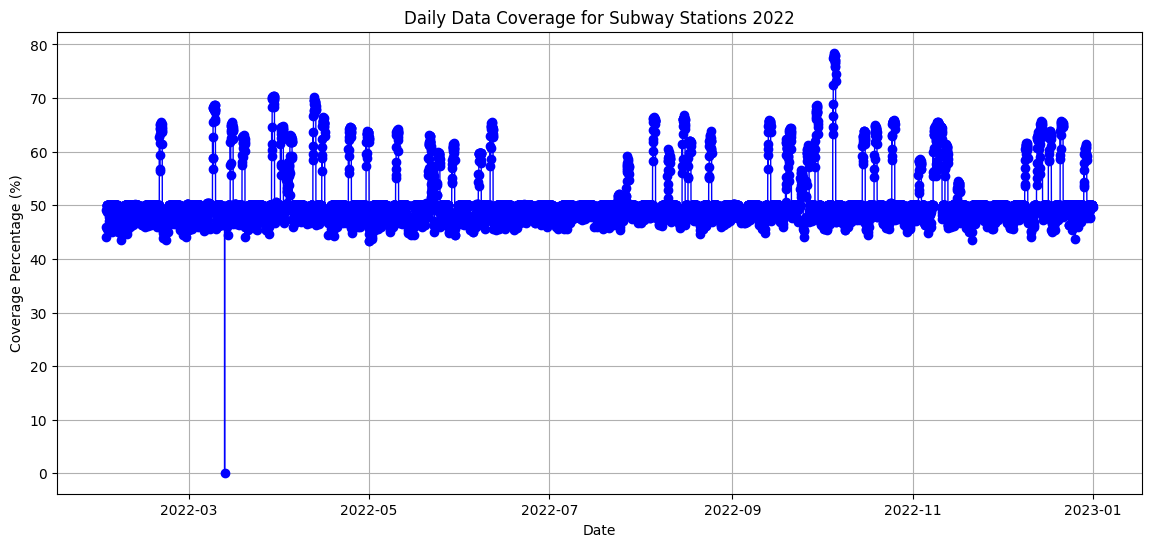

In [55]:
import matplotlib.pyplot as plt

# Convert datetime column to actual datetime format for easier plotting
date_coverage_df_22['datetime'] = pd.to_datetime(date_coverage_df_22['datetime'])

# Plot the data
plt.figure(figsize=(14, 6))
plt.plot(date_coverage_df_22['datetime'], date_coverage_df_22['coverage_percentage'], color='b', marker='o', linestyle='-', linewidth=1)
plt.title('Daily Data Coverage for Subway Stations 2022')
plt.xlabel('Date')
plt.ylabel('Coverage Percentage (%)')
plt.grid(True)
plt.show()


### EDA: Explore potential stations where overlap of stations/times might be more significant using heatmap.

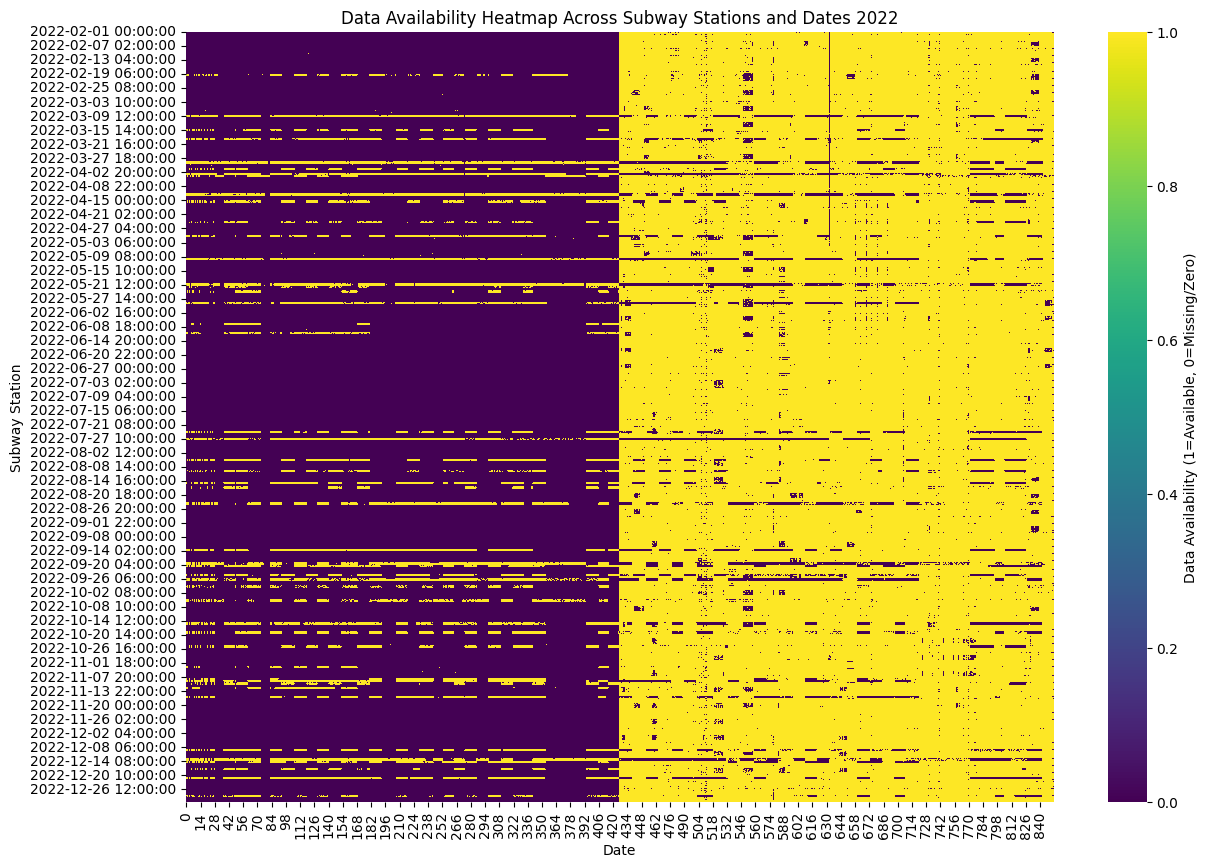

In [56]:
import seaborn as sns

# Sum non-zero data across all stations for each date (columns)
data_overlap_matrix_22 = non_zero_data_22.T  # Transpose for heatmap (dates on x-axis, stations on y-axis)

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(data_overlap_matrix_22, cmap='viridis', cbar_kws={'label': 'Data Availability (1=Available, 0=Missing/Zero)'})
plt.title('Data Availability Heatmap Across Subway Stations and Dates 2022')
plt.xlabel('Date')
plt.ylabel('Subway Station')
plt.show()

### EDA: Explore completeness of data for all stations.

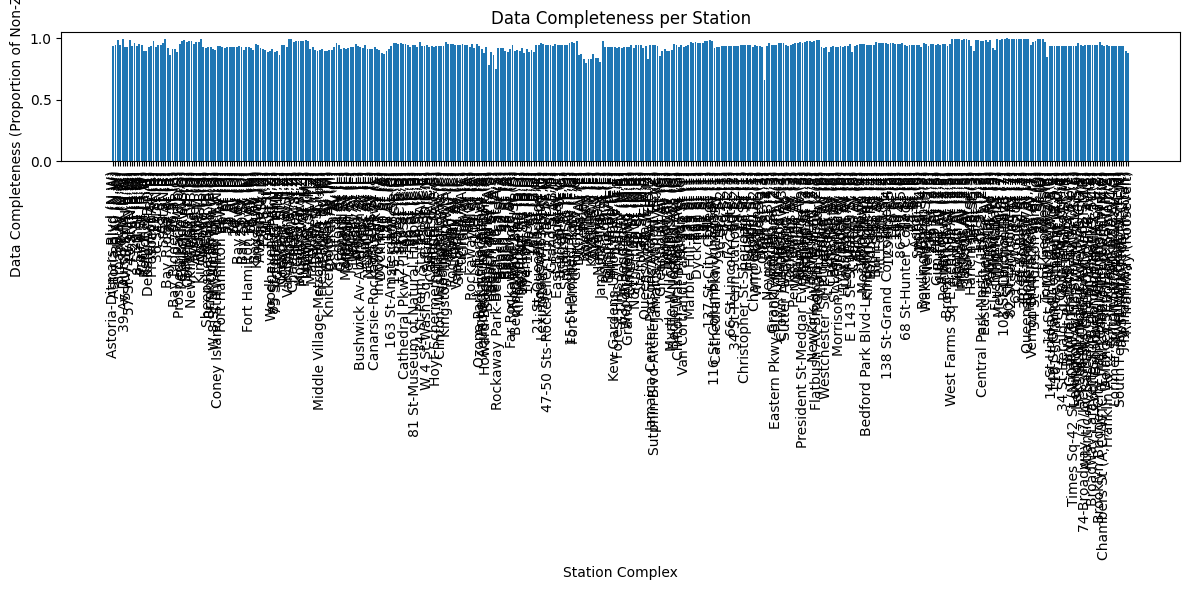

In [57]:
# Assuming df_summed is your DataFrame
# Extract only the columns with the timestamp data for analysis
date_columns_22 = df_summed_22.columns[5:]  # assuming first 5 columns are non-date metadata

# Calculate completeness as the proportion of non-zero values for each station
df_summed_22['completeness'] = df_summed_22[date_columns_22].astype(bool).sum(axis=1) / len(date_columns_22)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(df_summed_22['station_complex'], df_summed_22['completeness'])
plt.xticks(rotation=90)
plt.xlabel('Station Complex')
plt.ylabel('Data Completeness (Proportion of Non-Zero Values)')
plt.title('Data Completeness per Station')
plt.tight_layout()
plt.show()

### EDA: Explore distribution of completeness, box-plot.

In [58]:
df_summed_22['completeness'].describe()

count    854.000000
mean       0.508948
std        0.430561
min        0.002869
25%        0.090475
50%        0.703031
75%        0.940213
max        0.997380
Name: completeness, dtype: float64

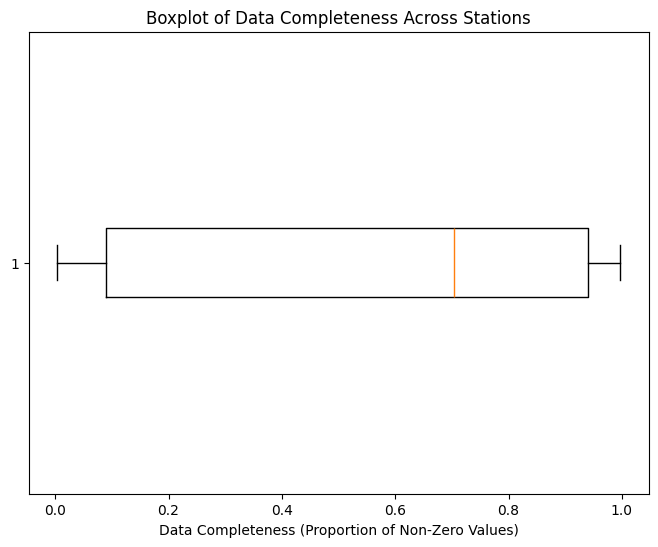

In [59]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_summed_22['completeness'], vert=False)
plt.xlabel('Data Completeness (Proportion of Non-Zero Values)')
plt.title('Boxplot of Data Completeness Across Stations')
plt.show()


### EDA: Identify station overlap in 2022-23 data that meet thresholds of 80% and 90% completeness.

In [60]:
stations_80_complete_22 = df_summed_22[df_summed_22['completeness'] >= 0.8]

# Display the result
display(stations_80_complete_22)

,station_complex_id,station_complex,borough,latitude,longitude,2022-02-01 00:00:00,2022-02-01 01:00:00,2022-02-01 02:00:00,2022-02-01 03:00:00,2022-02-01 04:00:00,...,2022-12-31 15:00:00,2022-12-31 16:00:00,2022-12-31 17:00:00,2022-12-31 18:00:00,2022-12-31 19:00:00,2022-12-31 20:00:00,2022-12-31 21:00:00,2022-12-31 22:00:00,2022-12-31 23:00:00,completeness
426,1,"Astoria-Ditmars Blvd (N,W)",Queens,40.775036,-73.912030,17.0,5.0,6.0,12.0,44.0,...,402.0,304.0,338.0,322.0,350.0,309.0,293.0,168.0,75.0,0.939496
427,10,"49 St (N,R,W)",Manhattan,40.759900,-73.984140,100.0,24.0,7.0,8.0,8.0,...,4.0,4.0,4.0,3.0,4.0,5.0,8.0,5.0,2.0,0.940120
428,100,"Hewes St (M,J)",Brooklyn,40.706870,-73.953430,10.0,3.0,0.0,3.0,5.0,...,69.0,69.0,55.0,58.0,61.0,67.0,52.0,56.0,25.0,0.910928
429,101,"Marcy Av (M,J,Z)",Brooklyn,40.708360,-73.957756,26.0,10.0,9.0,3.0,20.0,...,316.0,332.0,269.0,239.0,246.0,239.0,209.0,179.0,104.0,0.931512
430,103,"Bowery (J,Z)",Manhattan,40.720280,-73.993910,17.0,2.0,0.0,2.0,6.0,...,202.0,247.0,263.0,149.0,157.0,118.0,123.0,106.0,94.0,0.907186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,97,"Myrtle Av (M,J,Z)",Brooklyn,40.697210,-73.935650,13.0,12.0,8.0,10.0,39.0,...,247.0,231.0,198.0,261.0,234.0,314.0,243.0,180.0,83.0,0.977295
850,98,"Flushing Av (M,J)",Brooklyn,40.700260,-73.941124,18.0,8.0,3.0,2.0,14.0,...,196.0,188.0,141.0,118.0,156.0,121.0,84.0,85.0,39.0,0.986776
851,99,"Lorimer St (M,J)",Brooklyn,40.703870,-73.947410,9.0,2.0,1.0,0.0,2.0,...,82.0,77.0,68.0,80.0,64.0,73.0,64.0,49.0,24.0,0.978418
852,TRAM1,RI Tramway (Manhattan),Manhattan,40.761337,-73.964160,6.0,3.0,0.0,0.0,0.0,...,218.0,246.0,179.0,115.0,130.0,77.0,112.0,26.0,52.0,0.899077


In [61]:
# Pivot the table to create wide format with `transit_timestamp` as columns
wide_data_23 = hourly_ridership_23.pivot(
    index=['station_complex_id', 'station_complex', 'borough', 'latitude', 'longitude'],
    columns='transit_timestamp',
    values='ridership'
).reset_index()

# Flatten the column hierarchy created by pivot
wide_data_23.columns.name = None  # Remove the column name
wide_data_23.columns = [f"{col}" for col in wide_data_23.columns]
display(wide_data_23)

,station_complex_id,station_complex,borough,latitude,longitude,2023-01-01 00:00:00,2023-01-01 01:00:00,2023-01-01 02:00:00,2023-01-01 03:00:00,2023-01-01 04:00:00,...,2023-12-31 14:00:00,2023-12-31 15:00:00,2023-12-31 16:00:00,2023-12-31 17:00:00,2023-12-31 18:00:00,2023-12-31 19:00:00,2023-12-31 20:00:00,2023-12-31 21:00:00,2023-12-31 22:00:00,2023-12-31 23:00:00
0,1,"Astoria-Ditmars Blvd (N,W)",Queens,40.775036,-73.912030,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,"Astoria Blvd (N,W)",Queens,40.770260,-73.917850,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,"30 Av (N,W)",Queens,40.766780,-73.921480,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,"Broadway (N,W)",Queens,40.761820,-73.925510,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,"36 Av (N,W)",Queens,40.756805,-73.929570,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,97,"Myrtle Av (M,J,Z)",Brooklyn,40.697210,-73.935650,120.0,189.0,213.0,124.0,57.0,...,337.0,303.0,282.0,301.0,289.0,341.0,265.0,338.0,207.0,122.0
967,98,"Flushing Av (M,J)",Brooklyn,40.700260,-73.941124,54.0,55.0,44.0,23.0,22.0,...,173.0,186.0,213.0,182.0,184.0,152.0,149.0,119.0,102.0,39.0
968,99,"Lorimer St (M,J)",Brooklyn,40.703870,-73.947410,15.0,60.0,62.0,24.0,12.0,...,104.0,115.0,106.0,99.0,88.0,92.0,79.0,92.0,51.0,27.0
969,TRAM1,RI Tramway (Manhattan),Manhattan,40.761337,-73.964160,37.0,62.0,39.0,2.0,NaN,...,580.0,685.0,597.0,447.0,319.0,286.0,270.0,149.0,141.0,111.0


In [62]:
df_summed_23 = wide_data_23.groupby('station_complex_id', as_index=False).agg({
    'station_complex': 'first',
    'borough': 'first',
    'latitude': 'first',
    'longitude': 'first',
    **{col: 'sum' for col in wide_data_23.columns if col not in ['station_complex_id', 'station_complex', 'borough', 'latitude', 'longitude']}
})

# Display the result
display(df_summed_23)

,station_complex_id,station_complex,borough,latitude,longitude,2023-01-01 00:00:00,2023-01-01 01:00:00,2023-01-01 02:00:00,2023-01-01 03:00:00,2023-01-01 04:00:00,...,2023-12-31 14:00:00,2023-12-31 15:00:00,2023-12-31 16:00:00,2023-12-31 17:00:00,2023-12-31 18:00:00,2023-12-31 19:00:00,2023-12-31 20:00:00,2023-12-31 21:00:00,2023-12-31 22:00:00,2023-12-31 23:00:00
0,1,"Astoria-Ditmars Blvd (N,W)",Queens,40.775036,-73.912030,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,"Astoria Blvd (N,W)",Queens,40.770260,-73.917850,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,"30 Av (N,W)",Queens,40.766780,-73.921480,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,"Broadway (N,W)",Queens,40.761820,-73.925510,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,"36 Av (N,W)",Queens,40.756805,-73.929570,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,97,"Myrtle Av (M,J,Z)",Brooklyn,40.697210,-73.935650,120.0,189.0,213.0,124.0,57.0,...,337.0,303.0,282.0,301.0,289.0,341.0,265.0,338.0,207.0,122.0
849,98,"Flushing Av (M,J)",Brooklyn,40.700260,-73.941124,54.0,55.0,44.0,23.0,22.0,...,173.0,186.0,213.0,182.0,184.0,152.0,149.0,119.0,102.0,39.0
850,99,"Lorimer St (M,J)",Brooklyn,40.703870,-73.947410,15.0,60.0,62.0,24.0,12.0,...,104.0,115.0,106.0,99.0,88.0,92.0,79.0,92.0,51.0,27.0
851,TRAM1,RI Tramway (Manhattan),Manhattan,40.761337,-73.964160,37.0,62.0,39.0,2.0,0.0,...,580.0,685.0,597.0,447.0,319.0,286.0,270.0,149.0,141.0,111.0


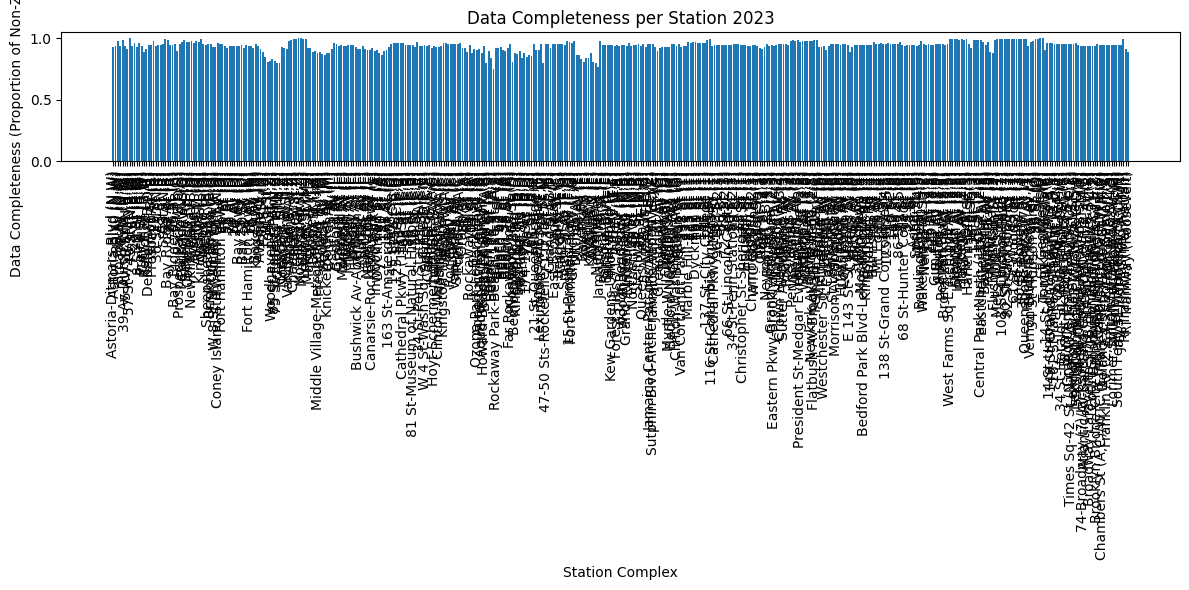

In [63]:
# Assuming df_summed is your DataFrame
# Extract only the columns with the timestamp data for analysis
date_columns_23 = df_summed_23.columns[5:]  # assuming first 5 columns are non-date metadata

# Calculate completeness as the proportion of non-zero values for each station
df_summed_23['completeness'] = df_summed_23[date_columns_23].astype(bool).sum(axis=1) / len(date_columns_23)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(df_summed_23['station_complex'], df_summed_23['completeness'])
plt.xticks(rotation=90)
plt.xlabel('Station Complex')
plt.ylabel('Data Completeness (Proportion of Non-Zero Values)')
plt.title('Data Completeness per Station 2023')
plt.tight_layout()
plt.show()

In [64]:
df_summed_23['completeness'].describe()

count    853.000000
mean       0.514519
std        0.429345
min        0.000343
25%        0.096244
50%        0.767896
75%        0.947711
max        1.000000
Name: completeness, dtype: float64

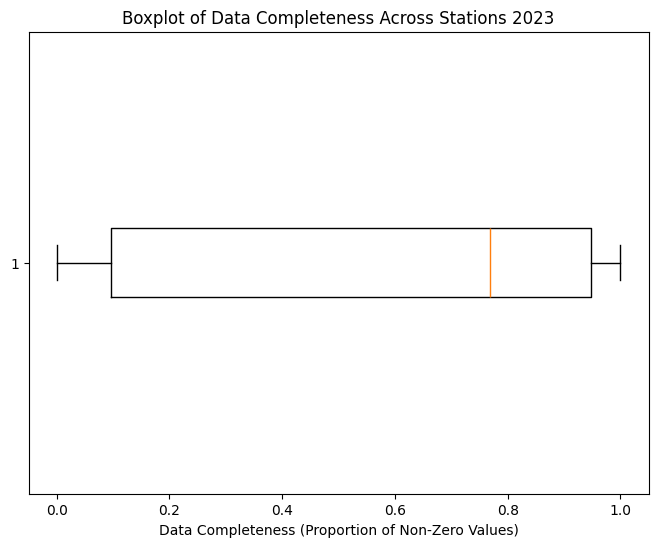

In [65]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_summed_23['completeness'], vert=False)
plt.xlabel('Data Completeness (Proportion of Non-Zero Values)')
plt.title('Boxplot of Data Completeness Across Stations 2023')
plt.show()


In [66]:
stations_80_complete_23 = df_summed_23[df_summed_23['completeness'] >= 0.8]

# Display the result
display(stations_80_complete_22)

,station_complex_id,station_complex,borough,latitude,longitude,2022-02-01 00:00:00,2022-02-01 01:00:00,2022-02-01 02:00:00,2022-02-01 03:00:00,2022-02-01 04:00:00,...,2022-12-31 15:00:00,2022-12-31 16:00:00,2022-12-31 17:00:00,2022-12-31 18:00:00,2022-12-31 19:00:00,2022-12-31 20:00:00,2022-12-31 21:00:00,2022-12-31 22:00:00,2022-12-31 23:00:00,completeness
426,1,"Astoria-Ditmars Blvd (N,W)",Queens,40.775036,-73.912030,17.0,5.0,6.0,12.0,44.0,...,402.0,304.0,338.0,322.0,350.0,309.0,293.0,168.0,75.0,0.939496
427,10,"49 St (N,R,W)",Manhattan,40.759900,-73.984140,100.0,24.0,7.0,8.0,8.0,...,4.0,4.0,4.0,3.0,4.0,5.0,8.0,5.0,2.0,0.940120
428,100,"Hewes St (M,J)",Brooklyn,40.706870,-73.953430,10.0,3.0,0.0,3.0,5.0,...,69.0,69.0,55.0,58.0,61.0,67.0,52.0,56.0,25.0,0.910928
429,101,"Marcy Av (M,J,Z)",Brooklyn,40.708360,-73.957756,26.0,10.0,9.0,3.0,20.0,...,316.0,332.0,269.0,239.0,246.0,239.0,209.0,179.0,104.0,0.931512
430,103,"Bowery (J,Z)",Manhattan,40.720280,-73.993910,17.0,2.0,0.0,2.0,6.0,...,202.0,247.0,263.0,149.0,157.0,118.0,123.0,106.0,94.0,0.907186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,97,"Myrtle Av (M,J,Z)",Brooklyn,40.697210,-73.935650,13.0,12.0,8.0,10.0,39.0,...,247.0,231.0,198.0,261.0,234.0,314.0,243.0,180.0,83.0,0.977295
850,98,"Flushing Av (M,J)",Brooklyn,40.700260,-73.941124,18.0,8.0,3.0,2.0,14.0,...,196.0,188.0,141.0,118.0,156.0,121.0,84.0,85.0,39.0,0.986776
851,99,"Lorimer St (M,J)",Brooklyn,40.703870,-73.947410,9.0,2.0,1.0,0.0,2.0,...,82.0,77.0,68.0,80.0,64.0,73.0,64.0,49.0,24.0,0.978418
852,TRAM1,RI Tramway (Manhattan),Manhattan,40.761337,-73.964160,6.0,3.0,0.0,0.0,0.0,...,218.0,246.0,179.0,115.0,130.0,77.0,112.0,26.0,52.0,0.899077


In [67]:
# Get the sets of station_complex_id from both DataFrames
ids_22_80 = set(stations_80_complete_22['station_complex_id'])
ids_23_80 = set(stations_80_complete_23['station_complex_id'])

# Find the intersection of the two sets (shared IDs)
shared_ids_80 = ids_22_80.intersection(ids_23_80)

# Convert to a sorted list (optional) for easy viewing
shared_ids_80 = sorted(shared_ids_80)

# Display the result
print(len(shared_ids_80), shared_ids_80)

420 ['1', '10', '100', '101', '103', '107', '108', '109', '110', '111', '113', '114', '118', '119', '120', '122', '123', '124', '125', '126', '127', '129', '13', '130', '131', '133', '134', '135', '136', '137', '138', '14', '141', '143', '144', '145', '146', '147', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '16', '160', '162', '164', '165', '167', '168', '169', '17', '173', '175', '176', '177', '179', '180', '181', '182', '183', '185', '186', '187', '188', '189', '190', '191', '192', '193', '194', '195', '196', '197', '198', '2', '20', '200', '201', '203', '204', '205', '206', '207', '208', '209', '210', '211', '212', '213', '214', '215', '216', '217', '218', '22', '220', '221', '222', '223', '225', '228', '231', '232', '234', '235', '236', '237', '238', '240', '241', '242', '243', '244', '245', '246', '248', '249', '250', '251', '254', '255', '256', '257', '258', '259', '26', '260', '261', '262', '263', '264', '265', '266', '268', '269', '270', '271',

In [68]:
stations_90_complete_22 = df_summed_22[df_summed_22['completeness'] >= 0.9]

stations_90_complete_23 = df_summed_23[df_summed_23['completeness'] >= 0.9]

# Get the sets of station_complex_id from both DataFrames
ids_22_90 = set(stations_90_complete_22['station_complex_id'])
ids_23_90 = set(stations_90_complete_23['station_complex_id'])

# Find the intersection of the two sets (shared IDs)
shared_ids_90 = ids_22_90.intersection(ids_23_90)

# Convert to a sorted list (optional) for easy viewing
shared_ids_90 = sorted(shared_ids_90)

# Display the result
print(len(shared_ids_90), shared_ids_90)

361 ['1', '10', '100', '101', '118', '119', '120', '122', '123', '124', '125', '126', '127', '129', '13', '130', '131', '133', '134', '135', '136', '137', '138', '14', '143', '147', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '16', '160', '162', '164', '165', '167', '168', '169', '17', '173', '175', '176', '177', '179', '180', '181', '182', '183', '185', '186', '187', '188', '189', '190', '192', '194', '195', '196', '198', '2', '203', '204', '205', '208', '209', '220', '221', '222', '223', '225', '228', '231', '232', '234', '235', '236', '237', '238', '240', '241', '242', '243', '254', '255', '256', '257', '258', '259', '26', '260', '261', '262', '263', '264', '265', '266', '268', '269', '270', '271', '272', '273', '277', '278', '279', '28', '280', '284', '288', '289', '290', '291', '292', '293', '294', '295', '296', '297', '298', '299', '3', '30', '300', '301', '303', '304', '305', '306', '307', '308', '309', '31', '310', '311', '312', '313', '314', '3

In [69]:
!{sys.executable} -m pip install geopandas shapely contextily
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
import contextily as ctx

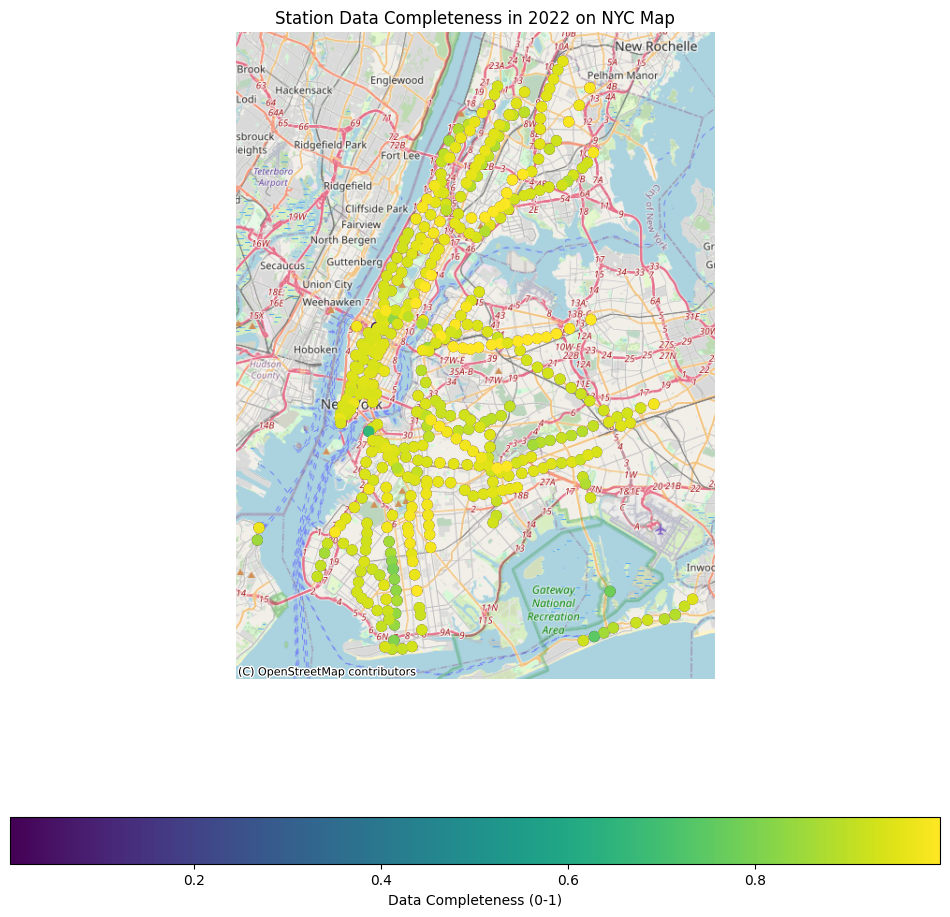

In [70]:
# Create a GeoDataFrame from df_summed_22 with latitude and longitude as geometry
geometry = [Point(xy) for xy in zip(df_summed_22['longitude'], df_summed_22['latitude'])]
gdf = gpd.GeoDataFrame(df_summed_22, geometry=geometry, crs="EPSG:4326")

# Project the GeoDataFrame to the web Mercator projection (EPSG:3857), which is compatible with contextily basemaps
gdf = gdf.to_crs(epsg=3857)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Plot the completeness data on top of the basemap
gdf.plot(
    ax=ax,
    column='completeness',
    cmap='viridis',
    legend=True,
    markersize=50,
    legend_kwds={'label': "Data Completeness (0-1)", 'orientation': "horizontal"}
)

# Add the basemap from contextily
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Set the title and remove axis for a cleaner map view
ax.set_title("Station Data Completeness in 2022 on NYC Map")
ax.set_axis_off()

plt.show()


In [71]:
!{sys.executable} -m pip install folium branca

In [72]:
import folium
import branca

# Create a base map centered around the average latitude and longitude
m = folium.Map(location=[df_summed_22['latitude'].mean(), df_summed_22['longitude'].mean()], zoom_start=11)

# Create a color scale using a linear colormap
colormap = branca.colormap.LinearColormap(colors=['yellow', 'red'], vmin=0, vmax=1)
colormap.caption = 'Data Completeness (0-1)'
m.add_child(colormap)

# Add markers to the map
for _, row in df_summed_22.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=5,  # You can adjust this size based on completeness if desired
        color=colormap(row['completeness']),
        fill=True,
        fill_color=colormap(row['completeness']),
        fill_opacity=0.7,
        popup=folium.Popup(f"{row['station_complex']}<br>Completeness: {row['completeness']:.2f}", parse_html=True),
    ).add_to(m)

# Save the map to an HTML file
m.save("interactive_map.html")

# Display the map in a Jupyter Notebook (if using one)
m

In [73]:
def impute_missing_data(df, station_ids):
    """
    Impute missing hourly data for specified stations based on the mean of the rest of the station's data
    for that hour on all other days.
    
    Parameters:
    - df: DataFrame containing hourly data with station_complex_id as one of the columns.
    - station_ids: List of station_complex_id's to impute.
    
    Returns:
    - DataFrame with missing values imputed.
    """
    
    # Filter DataFrame for the specified station IDs
    df_filtered = df[df['station_complex_id'].isin(station_ids)].copy()
    
    # Melt the DataFrame to long format for easier time handling
    df_melted = df_filtered.melt(id_vars=['station_complex_id', 'station_complex', 'borough', 'latitude', 'longitude'],
                                  var_name='timestamp', value_name='count')

    # Convert timestamp column to datetime
    df_melted['timestamp'] = pd.to_datetime(df_melted['timestamp'], errors='coerce')

    # Set timestamp as index
    df_melted.set_index('timestamp', inplace=True)

    # Create a new DataFrame to hold the filled data
    df_filled = df_melted.copy()

    for station_id in station_ids:
        # Get the station's data
        station_data = df_filled[df_filled['station_complex_id'] == station_id]
        
        # Group by hour and calculate mean for that hour
        hourly_mean = station_data.groupby(station_data.index.hour)['count'].mean()

        # Iterate over each row in the station's data
        for index, row in station_data.iterrows():
            if pd.isna(row['count']):
                # If the count is missing, fill it with the mean of that hour
                hour = index.hour
                df_filled.loc[index, 'count'] = hourly_mean[hour]

    # Pivot back to wide format
    df_final = df_filled.reset_index().pivot(index='station_complex_id', columns='timestamp', values='count')
    
    # Restore the non-time columns
    for col in ['station_complex', 'borough', 'latitude', 'longitude']:
        df_final[col] = df_filtered[df_filtered['station_complex_id'].isin(station_ids)][col].values[0]

    return df_final

# Assuming df_summed_22 and df_summed_23 are your DataFrames
stations_90_complete_22 = df_summed_22[df_summed_22['completeness'] >= 0.9]['station_complex_id'].tolist()
stations_90_complete_23 = df_summed_23[df_summed_23['completeness'] >= 0.9]['station_complex_id'].tolist()

# Get the intersection of station IDs from both years
stations_to_impute = set(stations_90_complete_22) & set(stations_90_complete_23)

# Impute missing data for both years
df_filled_22 = impute_missing_data(df_summed_22, stations_to_impute)
df_filled_23 = impute_missing_data(df_summed_23, stations_to_impute)


In [74]:
display(df_filled_23)

timestamp,NaT,2023-01-01 00:00:00,2023-01-01 01:00:00,2023-01-01 02:00:00,2023-01-01 03:00:00,2023-01-01 04:00:00,2023-01-01 05:00:00,2023-01-01 06:00:00,2023-01-01 07:00:00,2023-01-01 08:00:00,...,2023-12-31 18:00:00,2023-12-31 19:00:00,2023-12-31 20:00:00,2023-12-31 21:00:00,2023-12-31 22:00:00,2023-12-31 23:00:00,station_complex,borough,latitude,longitude
station_complex_id,,,,,,,,,,,,,,,,,,,,,
1,0.929787,79.0,52.0,56.0,6.0,24.0,26.0,76.0,85.0,119.0,...,406.0,307.0,335.0,319.0,234.0,63.0,"Astoria-Ditmars Blvd (N,W)",Queens,40.775036,-73.91203
10,0.938121,131.0,95.0,269.0,208.0,127.0,55.0,37.0,63.0,86.0,...,4.0,2.0,5.0,3.0,5.0,2.0,"Astoria-Ditmars Blvd (N,W)",Queens,40.775036,-73.91203
100,0.925562,13.0,52.0,31.0,18.0,10.0,4.0,2.0,7.0,14.0,...,71.0,74.0,101.0,84.0,54.0,26.0,"Astoria-Ditmars Blvd (N,W)",Queens,40.775036,-73.91203
101,0.923393,147.0,249.0,280.0,162.0,99.0,22.0,43.0,52.0,89.0,...,290.0,318.0,302.0,270.0,217.0,107.0,"Astoria-Ditmars Blvd (N,W)",Queens,40.775036,-73.91203
118,0.915972,227.0,268.0,200.0,128.0,63.0,24.0,11.0,28.0,23.0,...,292.0,286.0,309.0,320.0,326.0,148.0,"Astoria-Ditmars Blvd (N,W)",Queens,40.775036,-73.91203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.999772,34.0,61.0,29.0,29.0,16.0,24.0,30.0,52.0,56.0,...,182.0,191.0,164.0,141.0,114.0,55.0,"Astoria-Ditmars Blvd (N,W)",Queens,40.775036,-73.91203
96,0.999772,49.0,64.0,36.0,37.0,23.0,28.0,42.0,51.0,56.0,...,153.0,214.0,159.0,139.0,105.0,51.0,"Astoria-Ditmars Blvd (N,W)",Queens,40.775036,-73.91203
97,0.999657,120.0,189.0,213.0,124.0,57.0,37.0,49.0,80.0,104.0,...,289.0,341.0,265.0,338.0,207.0,122.0,"Astoria-Ditmars Blvd (N,W)",Queens,40.775036,-73.91203


In [80]:
df_filled_22 = df_filled_22.reset_index()

In [87]:
# Select only datetime columns
datetime_cols = df_filled_22.columns[df_filled_22.columns.to_series().apply(lambda x: pd.to_datetime(x, errors='coerce')).notna()]
df_filled_22 = df_filled_22[datetime_cols]

# If you want to keep 'station_complex_id' as index, you don't need to reset the index.
df_filled_22

timestamp,2022-02-01 00:00:00,2022-02-01 01:00:00,2022-02-01 02:00:00,2022-02-01 03:00:00,2022-02-01 04:00:00,2022-02-01 05:00:00,2022-02-01 06:00:00,2022-02-01 07:00:00,2022-02-01 08:00:00,2022-02-01 09:00:00,...,2022-12-31 14:00:00,2022-12-31 15:00:00,2022-12-31 16:00:00,2022-12-31 17:00:00,2022-12-31 18:00:00,2022-12-31 19:00:00,2022-12-31 20:00:00,2022-12-31 21:00:00,2022-12-31 22:00:00,2022-12-31 23:00:00
station_complex_id,,,,,,,,,,,,,,,,,,,,,
1,17.0,5.0,6.0,12.0,44.0,143.0,405.0,735.0,950.0,512.0,...,426.0,402.0,304.0,338.0,322.0,350.0,309.0,293.0,168.0,75.0
10,100.0,24.0,7.0,8.0,8.0,14.0,43.0,98.0,175.0,182.0,...,3.0,4.0,4.0,4.0,3.0,4.0,5.0,8.0,5.0,2.0
100,10.0,3.0,0.0,3.0,5.0,17.0,46.0,68.0,106.0,66.0,...,68.0,69.0,69.0,55.0,58.0,61.0,67.0,52.0,56.0,25.0
101,26.0,10.0,9.0,3.0,20.0,49.0,124.0,245.0,394.0,247.0,...,286.0,316.0,332.0,269.0,239.0,246.0,239.0,209.0,179.0,104.0
118,21.0,11.0,9.0,3.0,1.0,9.0,14.0,61.0,75.0,54.0,...,249.0,279.0,245.0,245.0,287.0,273.0,278.0,281.0,245.0,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6.0,2.0,5.0,6.0,24.0,85.0,135.0,296.0,298.0,196.0,...,227.0,147.0,160.0,143.0,172.0,183.0,170.0,151.0,116.0,62.0
96,11.0,4.0,4.0,7.0,15.0,58.0,113.0,214.0,244.0,169.0,...,194.0,153.0,112.0,128.0,137.0,175.0,181.0,153.0,128.0,61.0
97,13.0,12.0,8.0,10.0,39.0,91.0,229.0,357.0,472.0,317.0,...,276.0,247.0,231.0,198.0,261.0,234.0,314.0,243.0,180.0,83.0


In [89]:
# Select only datetime columns
datetime_cols = df_filled_23.columns[df_filled_23.columns.to_series().apply(lambda x: pd.to_datetime(x, errors='coerce')).notna()]
df_filled_23 = df_filled_23[datetime_cols]

# If you want to keep 'station_complex_id' as index, you don't need to reset the index.
df_filled_23

timestamp,2023-01-01 00:00:00,2023-01-01 01:00:00,2023-01-01 02:00:00,2023-01-01 03:00:00,2023-01-01 04:00:00,2023-01-01 05:00:00,2023-01-01 06:00:00,2023-01-01 07:00:00,2023-01-01 08:00:00,2023-01-01 09:00:00,...,2023-12-31 14:00:00,2023-12-31 15:00:00,2023-12-31 16:00:00,2023-12-31 17:00:00,2023-12-31 18:00:00,2023-12-31 19:00:00,2023-12-31 20:00:00,2023-12-31 21:00:00,2023-12-31 22:00:00,2023-12-31 23:00:00
station_complex_id,,,,,,,,,,,,,,,,,,,,,
1,79.0,52.0,56.0,6.0,24.0,26.0,76.0,85.0,119.0,178.0,...,383.0,334.0,334.0,357.0,406.0,307.0,335.0,319.0,234.0,63.0
10,131.0,95.0,269.0,208.0,127.0,55.0,37.0,63.0,86.0,128.0,...,1.0,4.0,3.0,1.0,4.0,2.0,5.0,3.0,5.0,2.0
100,13.0,52.0,31.0,18.0,10.0,4.0,2.0,7.0,14.0,34.0,...,81.0,66.0,60.0,50.0,71.0,74.0,101.0,84.0,54.0,26.0
101,147.0,249.0,280.0,162.0,99.0,22.0,43.0,52.0,89.0,90.0,...,353.0,364.0,376.0,364.0,290.0,318.0,302.0,270.0,217.0,107.0
118,227.0,268.0,200.0,128.0,63.0,24.0,11.0,28.0,23.0,33.0,...,212.0,231.0,249.0,236.0,292.0,286.0,309.0,320.0,326.0,148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,34.0,61.0,29.0,29.0,16.0,24.0,30.0,52.0,56.0,101.0,...,193.0,197.0,147.0,143.0,182.0,191.0,164.0,141.0,114.0,55.0
96,49.0,64.0,36.0,37.0,23.0,28.0,42.0,51.0,56.0,81.0,...,175.0,157.0,121.0,136.0,153.0,214.0,159.0,139.0,105.0,51.0
97,120.0,189.0,213.0,124.0,57.0,37.0,49.0,80.0,104.0,130.0,...,337.0,303.0,282.0,301.0,289.0,341.0,265.0,338.0,207.0,122.0


In [106]:
df_filled_22.to_pickle(r"D:\capstone_F24\data\Cleaned_data\df_filled_22.pkl")
df_filled_23.to_pickle(r"D:\capstone_F24\data\Cleaned_data\df_filled_23.pkl")

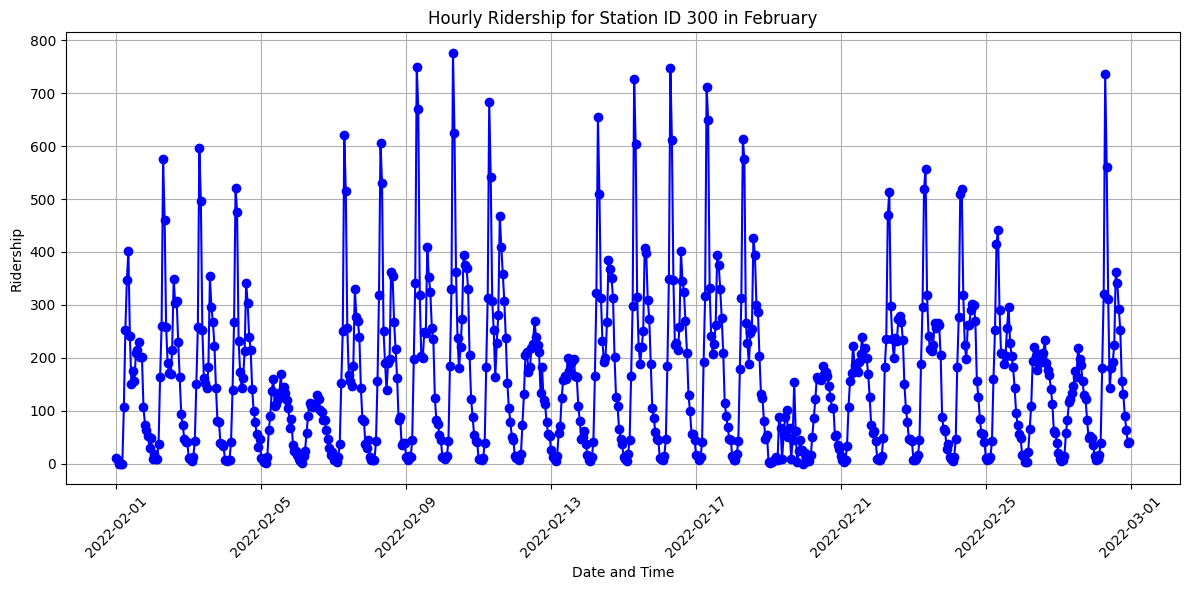

In [108]:
station_id = '300'

# Filter the DataFrame for the specific station ID
station_data = df_filled_22.loc[station_id]

# Transpose the data for plotting
station_data_transposed = station_data.transpose()

# Set the datetime index
station_data_transposed.index = pd.to_datetime(station_data_transposed.index)

february_data = station_data_transposed[station_data_transposed.index.month == 2]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(february_data.index, february_data.values, marker='o', color='blue')
plt.title(f'Hourly Ridership for Station ID {station_id} in February')
plt.xlabel('Date and Time')
plt.ylabel('Ridership')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()